In [59]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("C:/Users/sanke/Downloads/wine data/WineQT.csv")

In [63]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [65]:
df.sum()

fixed acidity             9499.600000
volatile acidity           607.320000
citric acid                306.740000
residual sugar            2894.250000
chlorides                   99.364000
free sulfur dioxide      17848.500000
total sulfur dioxide     52480.500000
density                   1139.262860
pH                        3784.490000
sulphates                  751.760000
alcohol                  11935.333333
quality                   6466.000000
Id                      920080.000000
dtype: float64

In [67]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [69]:
df.drop('Id',axis=1,inplace=True)

In [71]:
# Features
X=df.drop('quality',axis=1)

# Target variable
y=df['quality']

In [79]:
# Use Standardize feature

sc=StandardScaler()
x_scale=sc.fit_transform(X)

In [77]:
X.shape

(1143, 11)

In [87]:
# Use Pca 
pca=PCA()
X_pca=pca.fit_transform(x_scale)

In [91]:
explained_variance_ratio=pca.explained_variance_ratio_

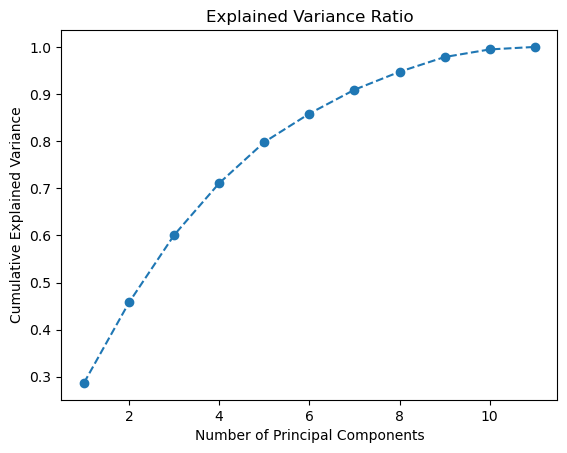

In [93]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o',
linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

In [109]:
n_components=5   # Choose the desired number of principal components you want to reduce a dimension to
pca=PCA(n_components=n_components)

In [111]:
x_pca=pca.fit_transform(X)
x_pca.shape
X.shape

(1143, 11)

In [ ]:
red_indices=y[y==5].index
white_indices=y[y==6].index

#Plot pca quality wise wine
plt.scatter(x_pca[red_indices, 0], x_pca[red_indices, 1], c='red', label='Red Wine')
plt.scatter(x_pca[white_indices, 0], x_pca[white_indices, 1], c='blue', label='White Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA: Red Wine vs. White Wine')
plt.show()